In [1]:
#Importamos las librerias necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import collections
import itertools

In [13]:
#Cargamos los dataframes de los tweets y los autores

df = pd.read_csv('Data/clean1_data.csv', index_col=0)

df_author = pd.read_csv('Data/author.csv', index_col=0)

- ¿Cuál es el tweet con mayor repercusión social? 
- ¿Cuál es el usuario que más menciona a la escuela? 
- ¿En qué mes se concentra el mayor número de tweets?
- ¿Qué palabras son más frecuentes?
- ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

In [3]:
df.head()

,author_id,text,created_at,id,retweet_count,reply_count,like_count,quote_count
0,1088261225153060864,🧑‍🎓Los emprendedores y profesionales digitales...,2022-07-13T14:45:06.000Z,1547230643561664515,1,0,2,0
1,1232276995796586499,Hoy hemos tenido una súper visita a nuestras o...,2022-07-13T13:22:40.000Z,1547209900874506241,1,0,3,0
2,1162694149956603904,¡Descubre la experiencia de Dani! ▶ Dani estud...,2022-07-12T11:22:45.000Z,1546817334882476032,2,0,0,0
3,1085383992,#VentureCapital/#PrivateEquity: @TheBridge_Tec...,2022-07-11T07:34:21.000Z,1546397466517540866,0,0,0,0
4,27890913,#Inversiones 💰💰\n\n@TheBridge_Tech ha cerrado ...,2022-07-07T10:16:04.000Z,1544988613129261056,0,0,0,0


In [32]:
df_author.head()

,id,name,username
0,1088261225153060864,GoHub Ventures,GoHubVentures
1,1232276995796586499,Ines Calabuig,InesCalabuig2
2,1162694149956603904,The Bridge,TheBridge_Tech
3,1085383992,Webcapitalriesgo.com,WCapitalRiesgo
4,27890913,El Referente,ElReferente


In [4]:
# 1- ¿Cuál es el tweet con mayor repercusión social? 

df.like_count.sort_values(ascending=False)

# El tweet con mas repercusión social es el que mas likes tiene en este caso el id correspondiente a 125

125    36
23     23
86     17
28     16
170    14
       ..
188     0
230     0
167     0
206     0
179     0
Name: like_count, Length: 256, dtype: int64

In [6]:
print(df.loc[125, 'text']) # Primer tweet con mas likes
print(df.loc[23, 'text']) # Segundo tweet con mas likes
df.loc[86, 'text'] # Tercer tweet con mas likes


🚨27/7 - 7:30PM - 🎙️PODCAST PRESENCIAL
📌MADRID, @TheBridge_Tech (Recoletos,15)
🤟🏻SÓLO 6⃣0⃣ ENTRADAS

🔞🍆🔝 "EL SENTIDO DE LA VIDA YA NO ES 42"

🔗 https://t.co/bPRHcq3PCo

Invitado: @GuillermoDeHaro con @Recuenco ha escrito "El pequeño libro de la filosofía estoica" de @alienta
El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp


'🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech \n\n🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D https://t.co/fqaYsbyxl7'

In [8]:
# 2- ¿Cuál es el usuario que más menciona a la escuela? 

df.groupby('author_id').count().loc[:,'id'].sort_values(ascending=False)

# El usuario con mas menciones a la escuela es el que tiene el id 1255794072280842240    

author_id
1255794072280842240    23
1162694149956603904    13
541058739               9
1493264171705765890     9
212364786               7
                       ..
190658967               1
183583012               1
175063066               1
148160316               1
1528649918306557952     1
Name: id, Length: 131, dtype: int64

In [21]:
(df_author.loc[df_author['id'] == 1255794072280842240, : ]) # Comprobamos el nombre del usuario con ese id, que es HeavyMental

,id,name,username
18,1255794072280842240,Heavy Mental,HeavyMental_es


In [23]:
import datetime as dt #importamos el datetime

In [26]:
# 3- ¿En qué mes se concentra el mayor número de tweets?
df.head()

df['created_at'] = pd.to_datetime(df.created_at)

df['months'] = df.created_at.dt.month

df.groupby('months').count().sort_values(by='text', ascending=False)

# El mes con mas menciones fue el mes de Junio

,author_id,text,created_at,id,retweet_count,reply_count,like_count,quote_count
months,,,,,,,,
6,118,118,118,118,118,118,118,118
4,41,41,41,41,41,41,41,41
5,38,38,38,38,38,38,38,38
2,17,17,17,17,17,17,17,17
3,15,15,15,15,15,15,15,15
1,14,14,14,14,14,14,14,14
7,13,13,13,13,13,13,13,13


In [27]:
# 4- ¿Qué palabras son más frecuentes?

df['word_list'] = df.text.str.lower().str.split()


In [28]:
word_list = [x for x in df.word_list]

all_words_no_urls = list(itertools.chain(*word_list))


In [29]:
counts_no_urls = collections.Counter(all_words_no_urls)

In [30]:
counts_no_urls.most_common(100)

# Las 10 palabras mas frecuentes son: bootcamp,thebridge_tech, presentación, talento, digital, libro, web, becas, futuro, inteligencia

[('de', 311),
 ('@thebridge_tech', 233),
 ('en', 182),
 ('la', 146),
 ('el', 124),
 ('y', 119),
 ('a', 113),
 ('que', 112),
 ('@recuenco', 84),
 ('@guillermodeharo', 81),
 ('@heavymental_es', 79),
 ('con', 66),
 ('las', 53),
 ('para', 51),
 ('por', 49),
 ('@alienta', 45),
 ('un', 44),
 ('no', 40),
 ('del', 39),
 ('los', 38),
 ('lo', 36),
 ('@_miki', 34),
 ('@davidalayon', 33),
 ('una', 29),
 ('es', 28),
 ('nos', 26),
 ('si', 22),
 ('se', 21),
 ('gracias', 20),
 ('sobre', 20),
 ('ya', 19),
 ('su', 16),
 ('pero', 15),
 ('te', 15),
 ('más', 14),
 ('me', 14),
 ('todos', 14),
 ('#bootcamp', 12),
 ('@thebridge_tech.', 12),
 ('presentación', 12),
 ('hay', 12),
 ('@mulder01198676', 12),
 ('talento', 11),
 ('al', 11),
 ('digital', 11),
 ('libro', 11),
 ('este', 11),
 ('@heavymental', 11),
 ('@arey', 11),
 ('hoy', 10),
 ('todo', 10),
 ('the', 10),
 ('@nodosenlared', 10),
 ('web', 10),
 ('becas', 10),
 ('junto', 10),
 ('futuro', 9),
 ('han', 9),
 ('primera', 9),
 ('os', 9),
 ('nuestro', 9),
 ('@g

<AxesSubplot:>

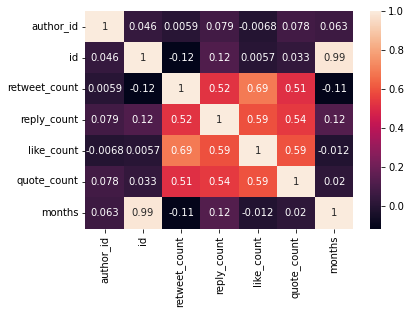

In [31]:
# 5- ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

df.head()

df.corr()

sns.heatmap(df.corr(), annot=True) 

#Observamos una correlacion entre las metricas, habiendo la mayor de ellas entre el like_count y el retweet count de 0.69